In [37]:
pip install wordcloud matplotlib numpy pillow nltk


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from collections import Counter
import string
from nltk import ngrams

# Configuration
folder_path = "/Users/nicho/Documents/Hong Kong/HKUST/UROP/TNFD/all"

stopwords = set([
    "a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", 
    "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", 
    "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", 
    "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", 
    "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", 
    "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", 
    "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", 
    "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", 
    "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", 
    "will", "with", "would", "yet", "you", "your"
]) 

In [39]:
# Read all text files from the folder
all_text = ""
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
            all_text += file.read() + " "

# Process the text
words = all_text.lower().split()
bigrams = [' '.join(gram) for gram in ngrams(words, 3)] # Change the "2" to "3" to allowing 3 words phrase
all_terms = words + bigrams

filtered_terms = [
    term for term in all_terms
    if all(
        word not in stopwords and 
        len(word) > 2 and 
        not word in string.punctuation
        for word in term.split()
    )
]

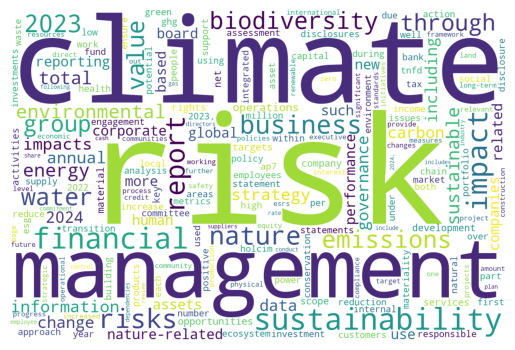

In [40]:
# Generate word frequencies
term_freq = Counter(filtered_terms)

# Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    collocations=True,
    max_words=200
).generate_from_frequencies(term_freq)

# Display
plt.imshow(wordcloud)
plt.axis("off")
plt.show()